<a href="https://colab.research.google.com/github/ntolayd/Projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/car.zip"

Archive:  /content/gdrive/My Drive/car.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [80]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

Exploratory Data Analysis and Preprocessing

In [79]:
data_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [81]:
data_train.describe(include=['object'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [35]:
data_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [36]:
# The average age of people that have less than 2 years of work experience
data_train[data_train['Work_Experience'] < 2]['Age'].mean()

45.77054794520548

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


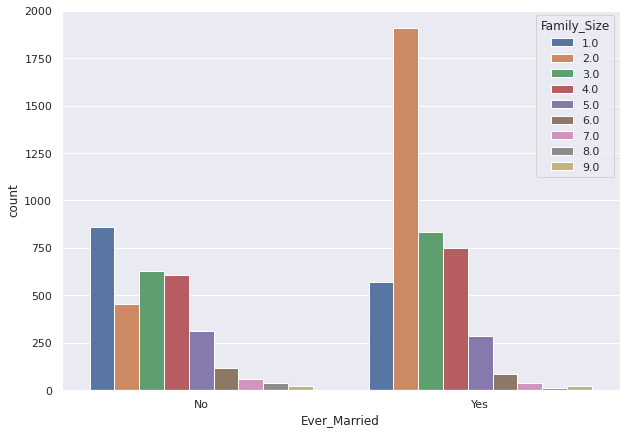

In [37]:
plt.figure(figsize=(10,7))
sns.countplot('Ever_Married', hue='Family_Size', data=data_train)

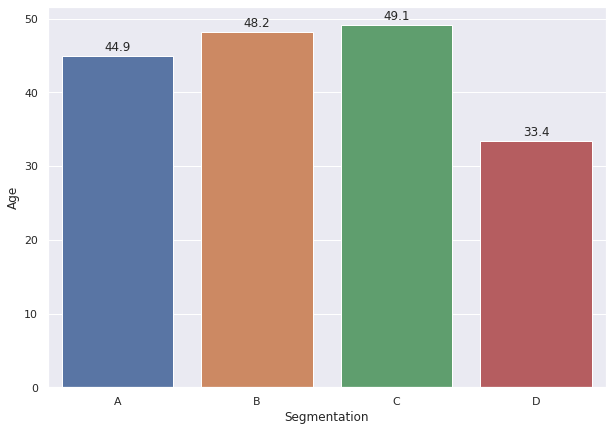

In [38]:
age_groups = data_train.groupby(['Segmentation'])['Age'].mean().reset_index()
plt.figure(figsize=(10,7))
splot = sns.barplot(x='Segmentation', y='Age', data=age_groups )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


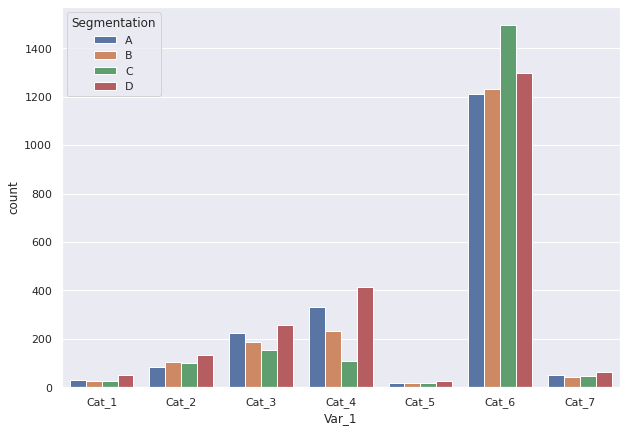

In [39]:
plt.figure(figsize=(10,7))
sns.countplot('Var_1', hue='Segmentation', data=data_train,  order=sorted(list(data_train['Var_1'].dropna().unique())), hue_order=sorted(data_train['Segmentation'].unique()))

In [74]:
data_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


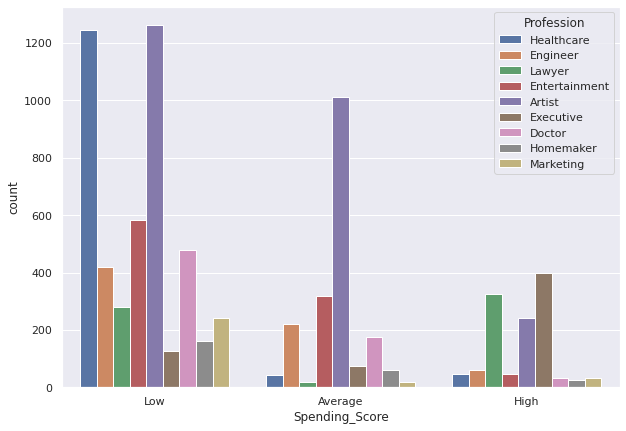

In [77]:
plt.figure(figsize=(10,7))
sns.countplot('Spending_Score', hue='Profession', data=data_train)

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot('Spending_Score', hue='Profession', data=data_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


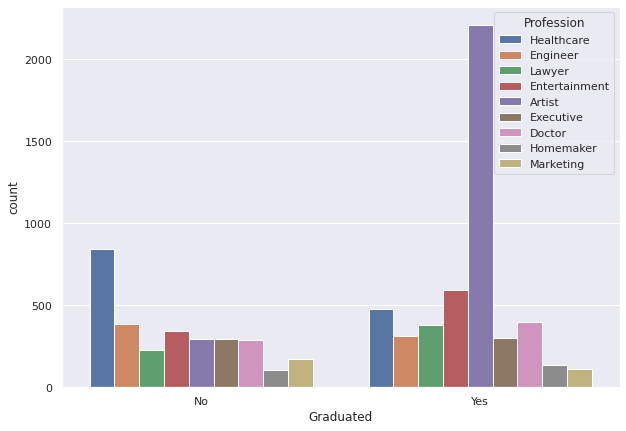

In [78]:
plt.figure(figsize=(10,7))
sns.countplot('Graduated', hue='Profession', data=data_train)

In [ ]:
data_train.drop(['Graduated'],axis=1, inplace=True)
data_test.drop(['Graduated'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


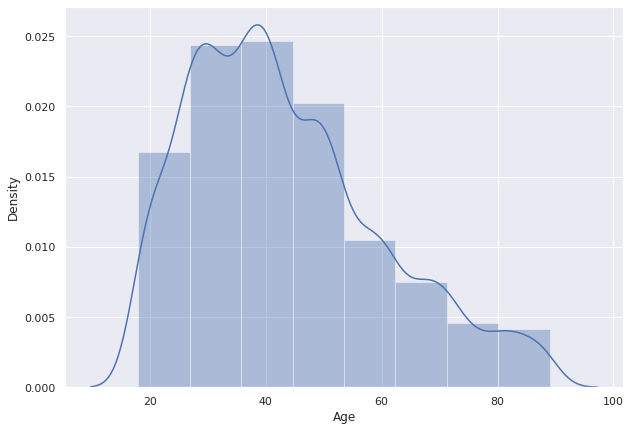

In [41]:
plt.figure(figsize=(10,7))
sns.distplot(data_train['Age'], bins=8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


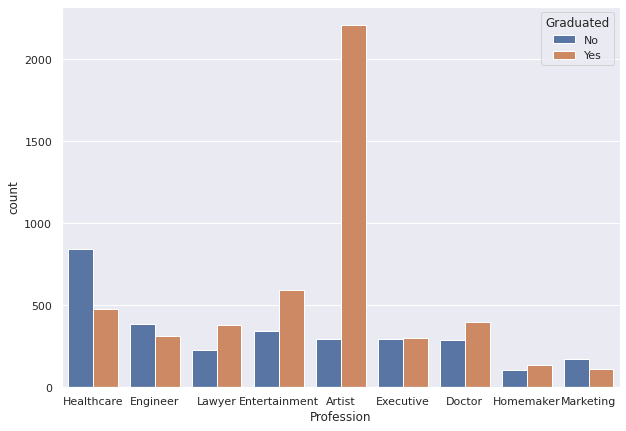

In [42]:
plt.figure(figsize=(10,7))
sns.countplot('Profession', hue='Graduated', data=data_train)

In [43]:
#remove work experience and ID columns
data_train.drop(['Work_Experience','ID'],axis=1, inplace=True)
data_test.drop(['Work_Experience','ID'],axis=1, inplace=True)

Gender : 6.151749448142619
Ever_Married : 538.6725088037484
Age : 2287.559684427274
Graduated : 362.52765870733566
Profession : 2242.598175948434
Spending_Score : 739.8335326197881
Family_Size : 151.3220450944962
Var_1 : 50.91190674980379


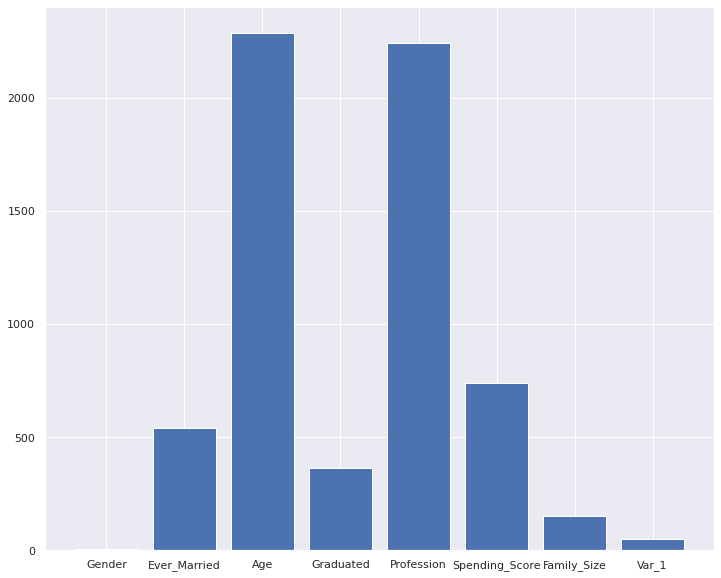

In [44]:
###Chi squared test for assesing relationship between features and target variable 
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
trans2= KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')

chi_data = data_train.dropna(how='any')
x = chi_data.drop(['Segmentation'],axis=1)
y = chi_data['Segmentation']
x['Age'] = trans.fit_transform(x['Age'].values.reshape(-1,1))
x['Family_Size'] = trans2.fit_transform(x['Family_Size'].values.reshape(-1,1))

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#prepare features
def prepare_inputs(X):
	oe = OrdinalEncoder()
	oe.fit(X)
	X_enc = oe.transform(X)
	return X_enc

# prepare target
def prepare_targets(y):
	le = LabelEncoder()
	le.fit(y)
	y_enc = le.transform(y)
	return y_enc

x = prepare_inputs(x)
y = prepare_targets(y)


from sklearn.feature_selection import SelectKBest,chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x, y)
labels= list(chi_data.drop(['Segmentation'],axis=1).columns)
# what are scores for the features
for i in range(len(fs.scores_)):
	print(labels[i], ":", fs.scores_[i])
# plot the scores
fig, ax = plt.subplots(figsize=(12,10))
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()

In [45]:
#replace nans in profession with Not_Specified
data_train.loc[data_train['Profession'].isna(),'Profession'] = 'Not_Specified'
data_test.loc[data_test['Profession'].isna(),'Profession'] = 'Not_Specified'

In [46]:
#family size imputer 
def  impute_family_size(df, lower_bound_age, upper_bound_age, marriage):
  impute_value = round(df[(df['Age'].between(lower_bound_age,upper_bound_age, inclusive=True))&(df['Ever_Married']==marriage)]['Family_Size'].mean())
  df.loc[(df['Family_Size'].isna())&(df['Age'].between(lower_bound_age,upper_bound_age, inclusive=True))&(df['Ever_Married']==marriage), 'Family_Size'] = impute_value
  return df

In [ ]:
#for train data
impute_family_size(data_train, 18,35,'No')
impute_family_size(data_train, 18,35,'Yes')
impute_family_size(data_train, 36,55,'No')
impute_family_size(data_train, 36,55,'Yes')
impute_family_size(data_train, 56,100,'No')
impute_family_size(data_train, 56,100,'Yes')

#for test data
impute_family_size(data_test, 18,35,'No')
impute_family_size(data_test, 18,35,'Yes')
impute_family_size(data_test, 36,55,'No')
impute_family_size(data_test, 36,55,'Yes')
impute_family_size(data_test, 56,100,'No')
impute_family_size(data_test, 56,100,'Yes')



In [50]:
#filling nans in Var_1 with the most frequent value
data_train['Var_1'].fillna(data_train['Var_1'].mode()[0], inplace=True)
data_test['Var_1'].fillna(data_train['Var_1'].mode()[0], inplace=True)

Modelling

In [53]:
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()

data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

X_train= data_train.drop(['Segmentation'],axis=1)
X_train = pd.get_dummies(X_train, drop_first=True)
y_train= encoder.fit_transform(data_train['Segmentation'])

X_test = data_test.drop(['Segmentation'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
y_test= encoder.transform(data_test['Segmentation'])

In [70]:
### Nested Cross Validation For model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
scaler=MinMaxScaler()
rf = RandomForestClassifier(random_state=33)
svm = SVC(random_state=33)
xg = XGBClassifier(random_state=33)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=33)
cv_outer = KFold(n_splits=5, shuffle=True, random_state=55)

In [56]:
#Support Vector Machine
pipe_svm = Pipeline(steps=[('scaler',scaler),('SVM',svm)])
param_grid_svm = {'SVM__C': [0.1, 1, 10, 100, 1000],  
              'SVM__gamma': [1, 0.1, 0.01, 0.001], 
              'SVM__kernel': ['rbf']}
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_svm = cross_val_score(grid_svm, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_svm)
print(np.mean(scores_svm), np.std(scores_svm))

[0.49117276 0.5220681  0.5220681  0.4977918  0.49968454]
0.5065570588071494 0.012976304654942202


In [57]:
#Random Forest
pipe_rf = Pipeline(steps=[('scaler',scaler),('RF',rf)])
param_grid_rf = {'RF__max_depth': [4,6,8],  
              'RF__max_features': [0.6, 0.8], 
              'RF__min_samples_split': [20,40,60],
              'RF__n_estimators': [100,250,500]}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_rf = cross_val_score(grid_rf, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_rf)
print(np.mean(scores_rf), np.std(scores_rf))


[0.51008827 0.53972257 0.52459016 0.48706625 0.51419558]
0.5151325676960471 0.01736753136225997


In [58]:
#XGBoost
pipe_xg = Pipeline(steps=[('scaler',scaler),('XG',xg)])
param_grid_xg = {'XG__max_depth': [4,6,8],  
              'XG__learning_rate': [0.01, 0.05, 0.1], 
              'XG__colsample_bytree': [0.8],
              'XG__subsample': [0.8],
              'XG__min_child_weight': [0.5,1,5],
              'XG__min_samples_split': [20,40,60]}
grid_xg = GridSearchCV(pipe_xg, param_grid_xg, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_xg = cross_val_score(grid_xg, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_xg)
print(np.mean(scores_xg), np.std(scores_xg))

[0.52080706 0.54539723 0.53783102 0.50662461 0.52933754]
0.5279994908127503 0.013488864284042352


In [59]:
#building model with the most related features
X_reduced= data_train[['Age','Profession','Spending_Score','Ever_Married']]
X_reduced = pd.get_dummies(X_reduced, drop_first=True)

In [60]:
#Support Vector Machine
pipe_svm = Pipeline(steps=[('scaler',scaler),('SVM',svm)])
param_grid_svm = {'SVM__C': [0.1, 1, 10, 100, 1000],  
              'SVM__gamma': [1, 0.1, 0.01, 0.001], 
              'SVM__kernel': ['rbf']}
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_svm = cross_val_score(grid_svm, X_reduced, y_train, scoring='accuracy', cv=cv_outer)
print(scores_svm)
print(np.mean(scores_svm), np.std(scores_svm))


[0.5037831  0.52837327 0.53026482 0.50725552 0.49652997]
0.5132413348661992 0.013589203055582113


In [62]:
#Random Forest
pipe_rf = Pipeline(steps=[('scaler',scaler),('RF',rf)])
param_grid_rf = {'RF__max_depth': [4,6,8],  
              'RF__max_features': [0.6, 0.8], 
              'RF__min_samples_split': [20,40,60],
              'RF__n_estimators': [100,250,500]}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_rf = cross_val_score(grid_rf, X_reduced, y_train, scoring='accuracy', cv=cv_outer)
print(scores_rf)
print(np.mean(scores_rf), np.std(scores_rf))


[0.51261034 0.52522068 0.51576293 0.48580442 0.50851735]
0.5095831427196169 0.0131030529562308


In [63]:
#XGBoost
pipe_xg = Pipeline(steps=[('scaler',scaler),('XG',xg)])
param_grid_xg = {'XG__max_depth': [4,6,8],  
              'XG__learning_rate': [0.01, 0.05, 0.1], 
              'XG__colsample_bytree': [0.8],
              'XG__subsample': [0.8],
              'XG__min_child_weight': [0.5,1,5],
              'XG__min_samples_split': [20,40,60]}
grid_xg = GridSearchCV(pipe_xg, param_grid_xg, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_xg = cross_val_score(grid_xg, X_reduced, y_train, scoring='accuracy', cv=cv_outer)
print(scores_xg)
print(np.mean(scores_xg), np.std(scores_xg))

[0.51008827 0.52774275 0.51702396 0.50031546 0.51419558]
0.5138732044187906 0.008950236528885611


In [65]:
#Final training with the best model
pipe_xg = Pipeline(steps=[('scaler',scaler),('XG',xg)])
param_grid_xg = {'XG__max_depth': [4,6,8],  
              'XG__learning_rate': [0.01, 0.05, 0.1], 
              'XG__colsample_bytree': [0.8],
              'XG__subsample': [0.8],
              'XG__min_child_weight': [0.5,1,5],
              'XG__min_samples_split': [20,40,60]}
grid_xg = GridSearchCV(pipe_xg, param_grid_xg, scoring='accuracy', n_jobs=-1,cv=cv_outer)
grid_xg.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=55, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('XG',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                 

In [66]:
grid_xg.best_params_

{'XG__colsample_bytree': 0.8,
 'XG__learning_rate': 0.1,
 'XG__max_depth': 4,
 'XG__min_child_weight': 5,
 'XG__min_samples_split': 20,
 'XG__subsample': 0.8}

In [69]:
pipe_xg_final = Pipeline(steps=[('scaler',scaler),('XG',XGBClassifier(colsample_bytree= 0.8, learning_rate=0.1, max_depth=4, min_child_weight=5, min_samples_split=20, subsample=0.8, random_state=33))])
pipe_xg_final.fit(X_train,y_train)
preds = pipe_xg_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.37      0.31      0.33       821
           1       0.26      0.20      0.23       543
           2       0.26      0.36      0.30       466
           3       0.43      0.48      0.45       747

    accuracy                           0.34      2577
   macro avg       0.33      0.34      0.33      2577
weighted avg       0.34      0.34      0.34      2577



In [71]:
print(confusion_matrix(y_test, preds))

[[253 124 188 256]
 [148 109 150 136]
 [123  99 166  78]
 [169  84 138 356]]
